Downloading...
From: https://drive.google.com/uc?id=15LSYaKYgg9GrVJgwSE_dBTPDefqShAaD
To: C:\Users\signo\dati.txt
100%|██████████| 771k/771k [00:00<00:00, 8.73MB/s]


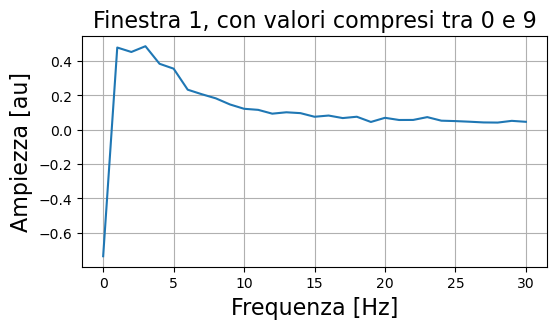

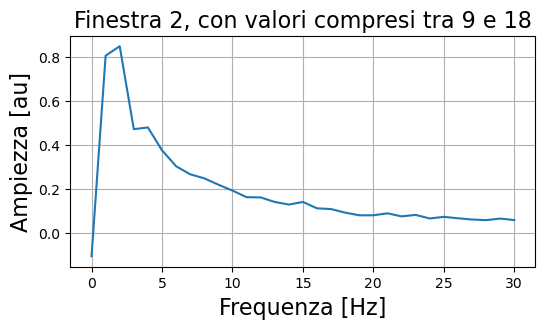

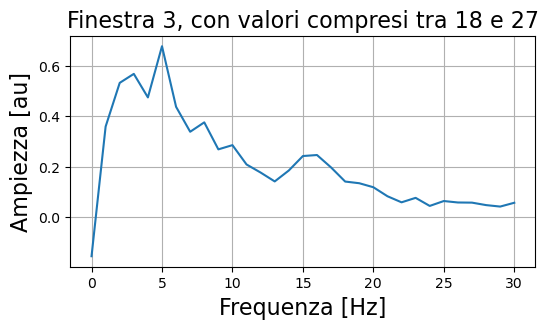

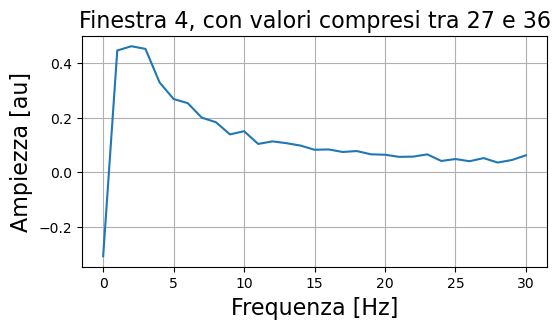

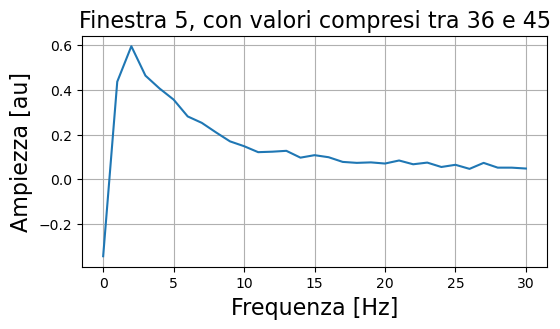

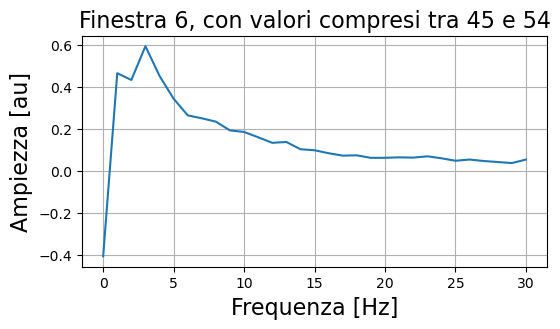

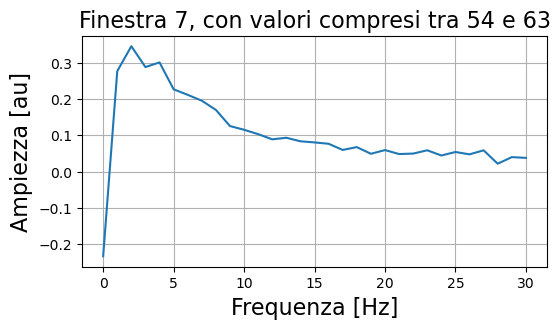

Non ci sono abbastanza valori


In [1]:
## PROVA SENZA OVERLAP con rimozione background
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import warnings
from Lettura_Dati import leggi_file  # Importa la funzione per leggere il file
import gdown
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from matplotlib.backends.backend_pdf import PdfPages
import os

# Ignora gli avvisi durante l'esecuzione del codice, come quelli relativi al log10
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Carica il background
background = np.load("Background.npy")  # Carica il background

# Link con l'ID del file
file_url = "https://drive.google.com/uc?id=15LSYaKYgg9GrVJgwSE_dBTPDefqShAaD"
# Scarica il file da Google Drive
gdown.download(file_url, 'dati.txt', quiet=False)

# Leggi il file
file_path = "dati.txt"
frames_array = leggi_file(file_path)

V = 255  # Numero di campioni per FFT
spectrogram = np.zeros((len(frames_array), V // 2), dtype=float)

# Calcola lo spettrogramma
for i, frame in enumerate(frames_array):
    yf_high1 = fft(frame[0:V], axis=0)
    spectrogram[i, :] = np.abs(yf_high1[:V // 2])

# Calcola il tempo totale e le frequenze
T_frame = 1 
tempo_totale = len(frames_array) * T_frame
xf_high = fftfreq(V, T_frame / V)[:V // 2]

# Rimozione del background
spectrogram_without_baseline = spectrogram - background[:V // 2]
spectrogram_without_baseline_real = np.real(spectrogram_without_baseline)

# Frequenze tra 0 e 30 Hz
freq_min = 0
freq_max = 30
idx_freq_min = np.argmax(xf_high >= freq_min)
idx_freq_max = np.argmax(xf_high > freq_max)

# Parametri per la finestratura
Nm = 9  # Numero di frame per blocco (senza sovrapposizione)
i = 0

# Numero totale di finestre
while True:
    # Indice di inizio e fine finestra
    start_idx = i * Nm
    end_idx = start_idx + Nm

    # Verifica che ci siano abbastanza dati
    block_frames = spectrogram_without_baseline_real[start_idx:end_idx]
    if len(block_frames) < Nm:
        print('Non ci sono abbastanza valori')
        break
    else:
        # Calcola la media del blocco
        mean_fft_block = np.mean(block_frames, axis=0)
        mean_fft_block_real = np.real(mean_fft_block[idx_freq_min:idx_freq_max])

        # Frequenze selezionate tra 0 e 30 Hz
        xf_selected = xf_high[idx_freq_min:idx_freq_max]

        # Plot della finestra corrente
        i += 1
        plt.figure(figsize=(6, 3))
        plt.plot(xf_selected, mean_fft_block_real)
        plt.title(f'Finestra {i}, con valori compresi tra {start_idx} e {end_idx}', fontsize=16)
        plt.xlabel('Frequenza [Hz]', fontsize=16)
        plt.ylabel('Ampiezza [au]', fontsize=16)
        plt.grid(True)
        plt.show()


Downloading...
From: https://drive.google.com/uc?id=15LSYaKYgg9GrVJgwSE_dBTPDefqShAaD
To: C:\Users\signo\dati.txt
100%|██████████| 771k/771k [00:00<00:00, 1.50MB/s]


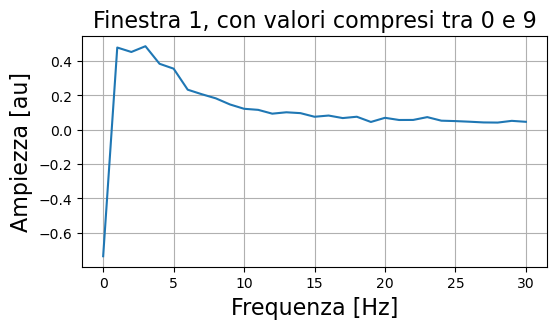

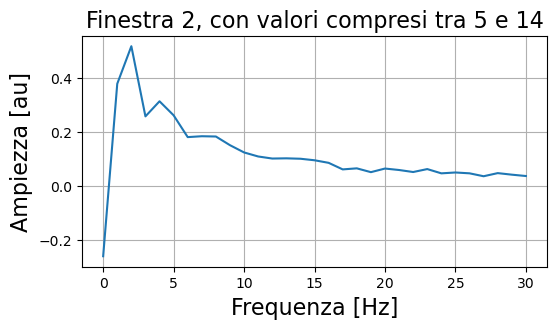

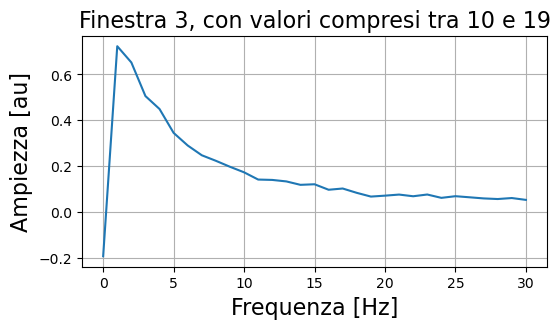

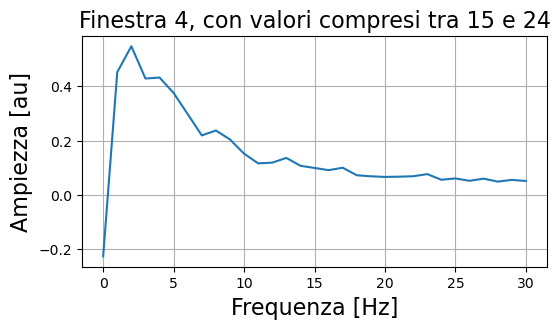

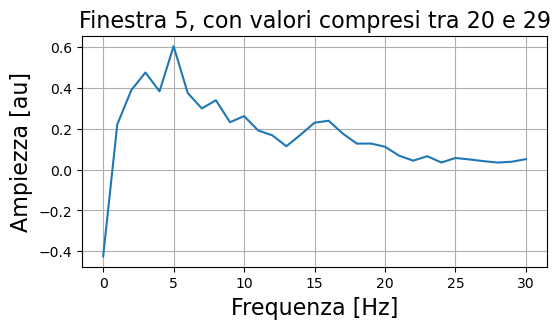

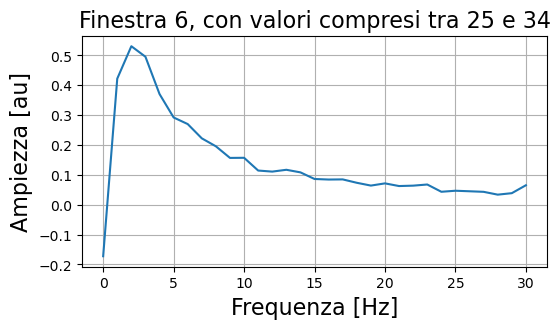

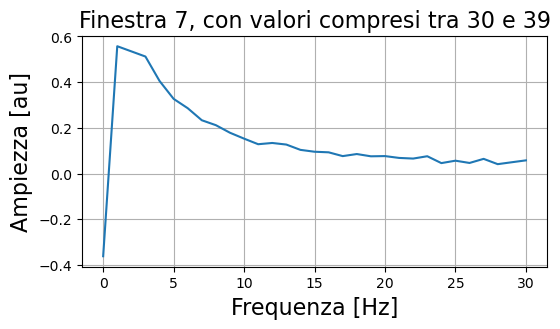

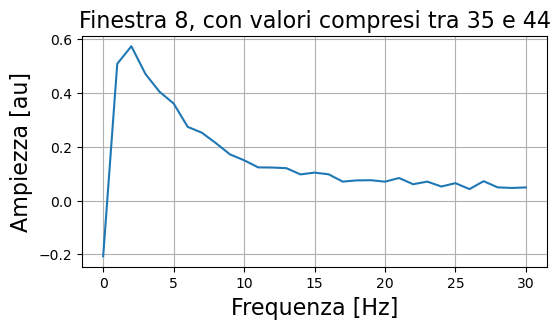

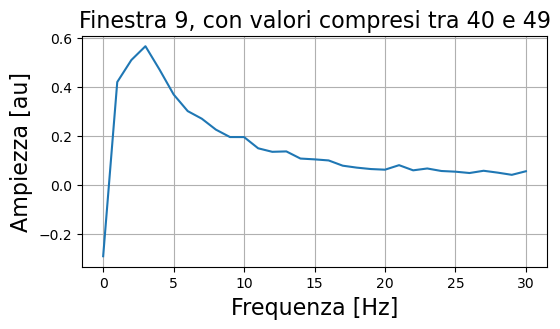

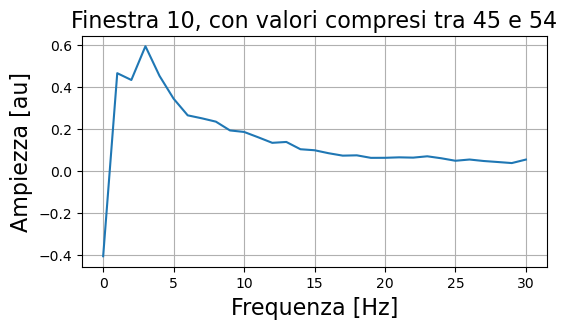

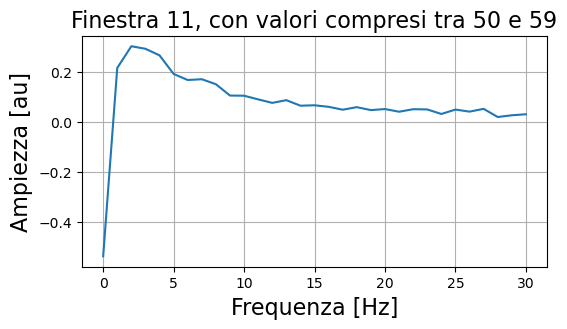

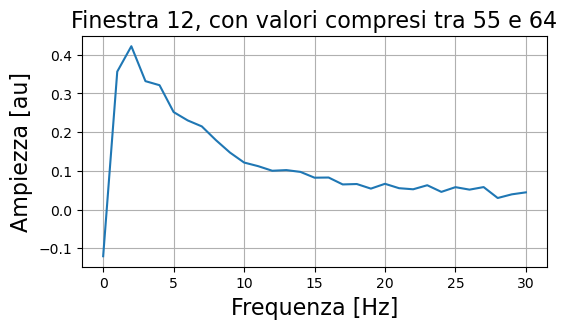

Non ci sono abbastanza valori per la finestra


In [3]:
##PROVA CON OVERLAP PER FAR ARRIVARE LE FREQUENZE A 120 E POI VANNO FILTRATE FINO A 30
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import warnings
from Lettura_Dati import leggi_file  # Importa la funzione per leggere il file
import gdown
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from matplotlib.backends.backend_pdf import PdfPages
import os


# Ignora gli avvisi durante l'esecuzione del codice (es. avvisi su log10)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Carica il background
background = np.load("Background.npy")

# Leggi il file
# Link con l'ID del file
file_url = "https://drive.google.com/uc?id=15LSYaKYgg9GrVJgwSE_dBTPDefqShAaD"
# Scarica il file da Google Drive
gdown.download(file_url, 'dati.txt', quiet=False)

# Leggi il file
file_path = "dati.txt"
frames_array = leggi_file(file_path)

# Imposta i parametri per FFT
V = 256  # Numero di campioni per FFT
spectrogram = np.zeros((len(frames_array), V // 2), dtype=float)

# Calcola lo spettrogramma
for i, frame in enumerate(frames_array):
    yf_high1 = fft(frame[0:V], axis=0)
    spectrogram[i, :] = np.abs(yf_high1[:V // 2])

# Calcola le frequenze
T_frame = 1 
xf_high = fftfreq(V, T_frame / V)[:V // 2]

# Rimuove il background dallo spettrogramma
spectrogram_without_baseline = spectrogram - background[:V // 2]
spectrogram_without_baseline_real = np.real(spectrogram_without_baseline)

# Parametri per la finestratura e sovrapposizione
Nm = 9         # Numero di frame per finestra
overlap = 4    # Sovrapposizione tra le finestre
i = 0

# Frequenze da selezionare tra 0 e 30 Hz
freq_min = 0
freq_max = 30
idx_freq_min = np.argmax(xf_high >= freq_min)
idx_freq_max = np.argmax(xf_high > freq_max)
xf_selected = xf_high[idx_freq_min:idx_freq_max]

# Ciclo per processare ogni finestra con sovrapposizione
while True:
    # Indice di inizio e fine 
    start_idx = i * (Nm - overlap)
    end_idx = start_idx + Nm

    # VerificO se ci sono abbastanza frame per la finestra
    block_frames = spectrogram_without_baseline_real[start_idx:end_idx]
    if len(block_frames) < Nm:
        print('Non ci sono abbastanza valori per la finestra')
        break
    else:
        # Calcola la media della FFT sul blocco di frame
        mean_fft_block = np.mean(block_frames, axis=0)
        mean_fft_block_real = np.real(mean_fft_block[idx_freq_min:idx_freq_max])

        # Plot della finestra corrente
        i += 1
        plt.figure(figsize=(6, 3))
        plt.plot(xf_selected, mean_fft_block_real)
        plt.title(f'Finestra {i}, con valori compresi tra {start_idx} e {end_idx}', fontsize=16)
        plt.xlabel('Frequenza [Hz]', fontsize=16)
        plt.ylabel('Ampiezza [au]', fontsize=16)
        plt.grid(True)
        plt.show()
